<a href="https://colab.research.google.com/github/iamgus123/dl19/blob/main/notebook/ch10_cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL: cifar10

170498071/170498071 [==============================] - 4s 0us/step


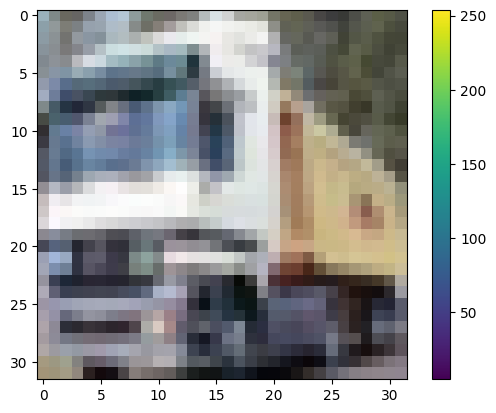

In [1]:
# import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np

# CFAR-10 데이터 세트를 적재한다.
# 훈련 세트와 테스트 세트를 반환받는다. 
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# 두 번째 영상(트럭)을 화면에 표시한다. 
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()



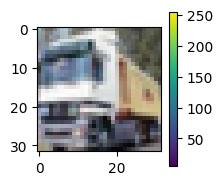

In [2]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[1])
plt.colorbar()

In [3]:
# 영상의 픽셀 값을 0에서 1 사이로 변환한다. 
X_train = X_train/255.0
X_test = X_test/255.0



In [4]:
# 순차 모델을 구축한다. 
model = Sequential()
model.add(Conv2D(64, activation = 'relu', kernel_size = (3,3 ), input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3 )))
model.add(Flatten())
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# 모델을 컴파일한다. 
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [5]:
# 모델을 훈련한다. 
history = model.fit(X_train, y_train, epochs=10, verbose=1, 
                  validation_split=0.3)



Epoch 1/10
1094/1094 [==============================] - 17s 5ms/step - loss: 1.5505 - accuracy: 0.4392 - val_loss: 1.2907 - val_accuracy: 0.5444
Epoch 2/10
1094/1094 [==============================] - 5s 4ms/step - loss: 1.2080 - accuracy: 0.5754 - val_loss: 1.1836 - val_accuracy: 0.5911
Epoch 3/10
1094/1094 [==============================] - 8s 7ms/step - loss: 1.0564 - accuracy: 0.6281 - val_loss: 1.0830 - val_accuracy: 0.6199
Epoch 4/10
1094/1094 [==============================] - 7s 7ms/step - loss: 0.9561 - accuracy: 0.6636 - val_loss: 1.0509 - val_accuracy: 0.6381
Epoch 5/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.8615 - accuracy: 0.6971 - val_loss: 1.0247 - val_accuracy: 0.6469
Epoch 6/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.7890 - accuracy: 0.7212 - val_loss: 1.0455 - val_accuracy: 0.6451
Epoch 7/10
1094/1094 [==============================] - 6s 5ms/step - loss: 0.7171 - accuracy: 0.7475 - val_loss: 1.0420 - val_accuracy

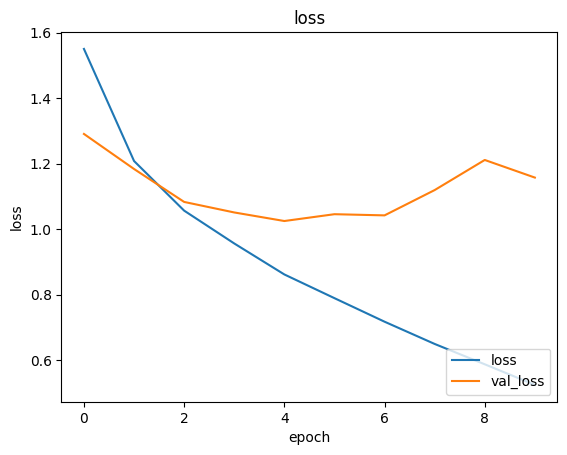

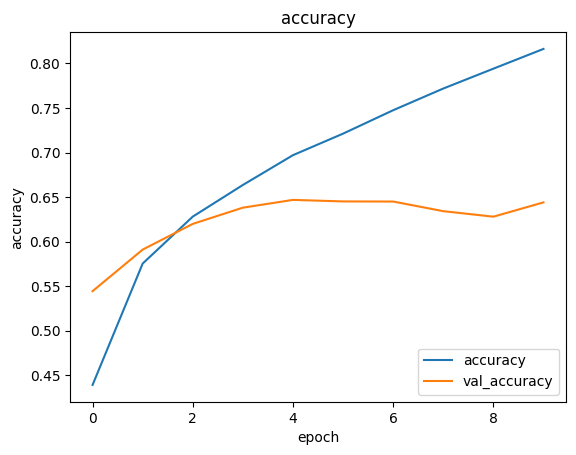

313/313 [==============================] - 1s 2ms/step
정답= [3]
예측값= [1.0539263e-03 4.5236429e-06 6.0610386e-04 7.8470498e-01 2.0319717e-04
 1.2605709e-01 8.8051585e-03 3.7612424e-03 7.4531294e-02 2.7247728e-04] 3
313/313 [==============================] - 1s 3ms/step - loss: 1.1755 - accuracy: 0.6378


[1.1755428314208984, 0.6377999782562256]

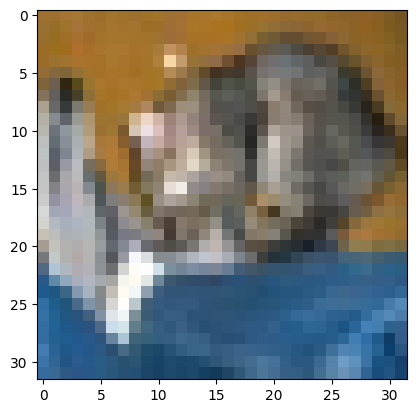

In [6]:
# 손실값을 그래프로 그린다. 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc = 'lower right')
plt.show()

# 정확도를 그래프로 그린다. 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc = 'lower right')
plt.show()

plt.figure()
plt.imshow(X_test[0])
y_pred = model.predict(X_test)
print("정답=", y_test[0])
print("예측값=", y_pred[0], np.argmax(y_pred[0]))

#################################
# Evaluate the model
#################################
model.evaluate(X_test,y_test)
